<a href="https://colab.research.google.com/github/sandhiya0147/Data_Science/blob/main/modelbuilding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TASK ASSIGNMENT 2**

"Predicting Diabetes Using machine learning"

1.Import Libraries:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

2.Load Datasets:

In [ ]:
df=pd.read_csv('/content/diabetes.csv')

3.Basic Analysis:

In [ ]:
df.info()
print("\nData Head\n",df.head())
print("\nData Tail\n",df.tail())
print("\nData Shape\n",df.shape)
print("\nData Describe\n",df.describe)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB

Data Head
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2           

In [ ]:
print("\nMissing values:\n",df.isnull().sum())


Missing values:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
outcome                     0
dtype: int64


4.visual Analysis:

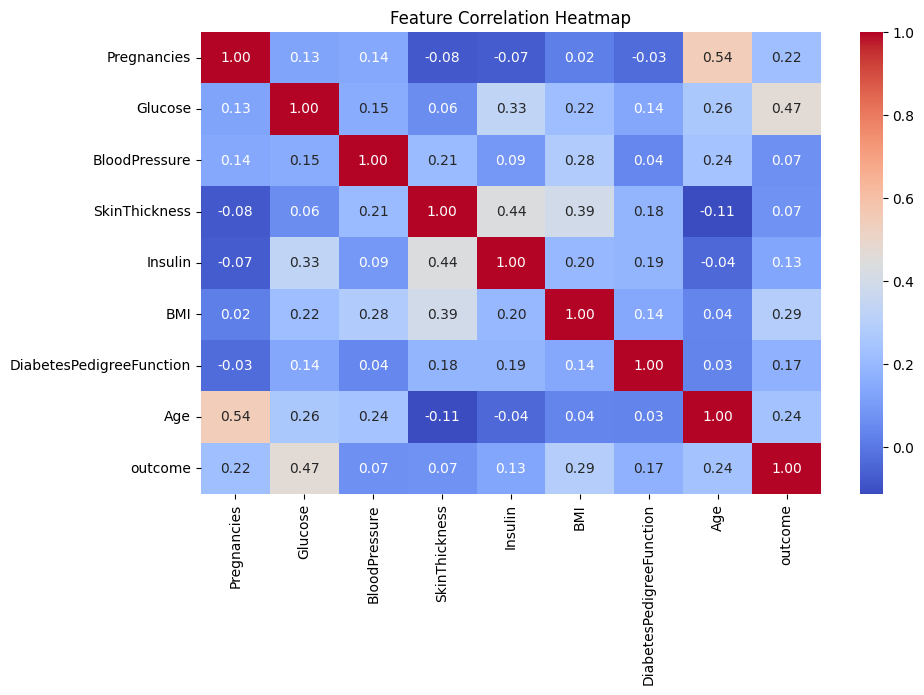

In [ ]:
numeric_df = df.select_dtypes(include=['float64','int64'])
numeric_df.fillna(numeric_df.median(),inplace=True)
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(),annot=True,cmap='coolwarm',fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

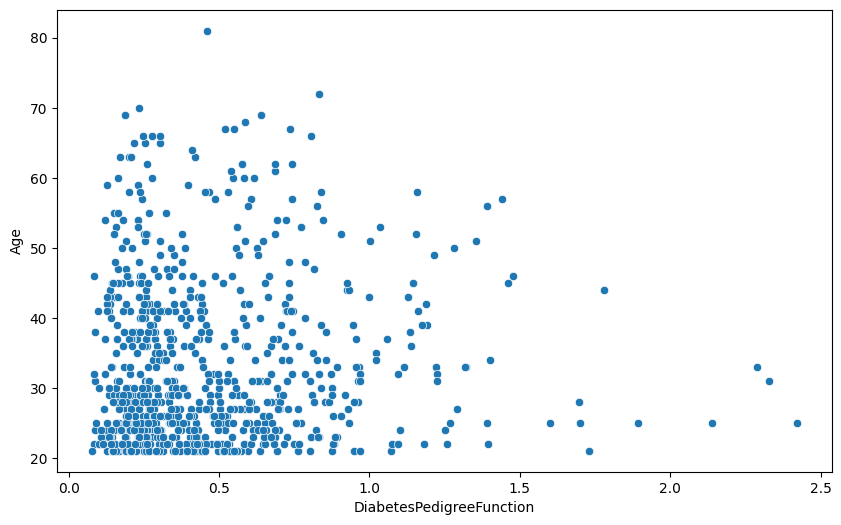

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='DiabetesPedigreeFunction', y='Age', data=df)
plt.show()

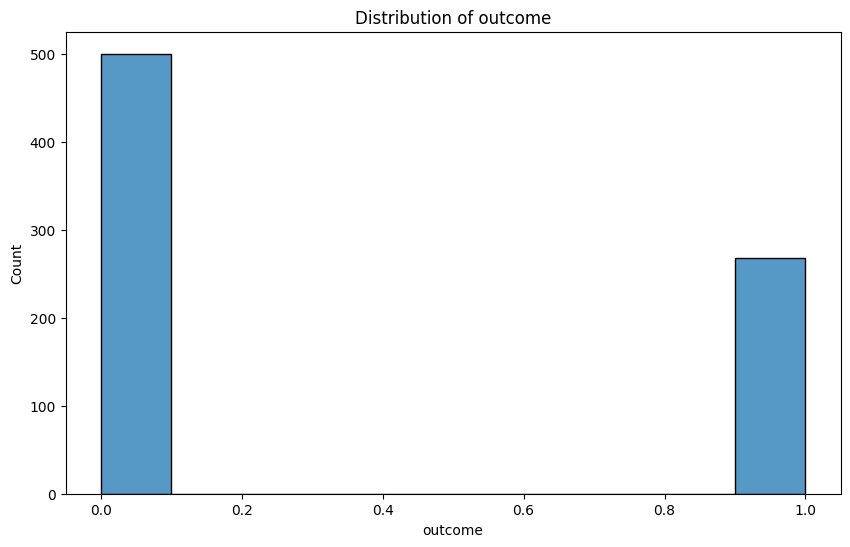

In [45]:
plt.figure(figsize=(10, 6))
sns.histplot(df['outcome'], bins=10)  # Adjust 'bins' as needed
plt.title("Distribution of outcome")
plt.show()

In [ ]:
print(f"Correlation: {df.corr().iloc[0,1]:.2f}")

Correlation: 0.13


5.Model Building:

**Random Forest:**

In [ ]:

X = df.drop('outcome', axis=1)
y = df['outcome']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Feature Importance:
Glucose                     0.367298
BMI                         0.193321
Age                         0.128205
DiabetesPedigreeFunction    0.080937
Pregnancies                 0.070974
Insulin                     0.061641
BloodPressure               0.050669
SkinThickness               0.046955
dtype: float64


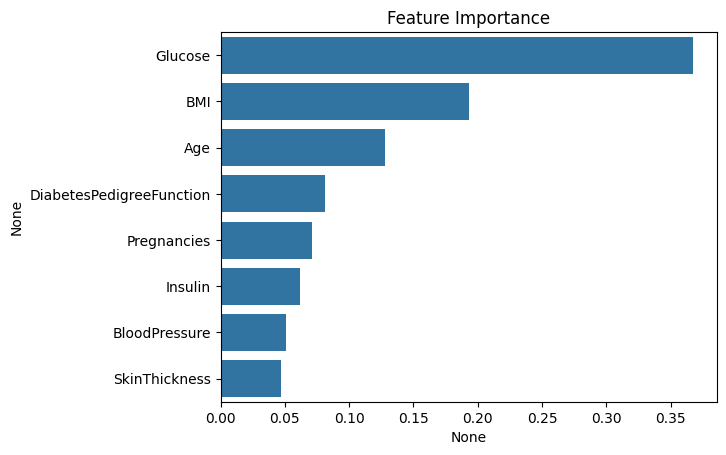

In [ ]:

model = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    random_state=42,
    class_weight='balanced'
)
model.fit(X_train_scaled, y_train)

feature_imp = pd.Series(model.feature_importances_,
                       index=X.columns).sort_values(ascending=False)
print("\nFeature Importance:")
print(feature_imp)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.title('Feature Importance')
plt.show()

Prediction:

In [ ]:
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:,1]

Evaluation metrics:

In [ ]:
print("\nModel Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_proba):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Model Evaluation:
Accuracy: 0.77
AUC-ROC: 0.83

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.77      0.81       100
           1       0.64      0.76      0.69        54

    accuracy                           0.77       154
   macro avg       0.75      0.76      0.75       154
weighted avg       0.78      0.77      0.77       154



Confusion matrix:

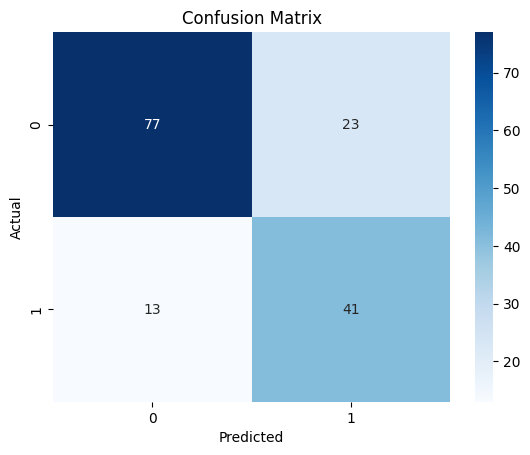

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()